Emily Wang | GF Baking | MatSci 2016

## Accessing and Plotting the Instron Data Captured
in .csv Format

(See other notebook for the situation with the .raw format)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import numpy as np
import pprint as pp

/home/greenteawarrior/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Compression Tests

#### 1TspPectin (April 11, 2016)

In [2]:
# import
p1tsp_compress1 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress2 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p1tsp_compress3 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p1tsp_compress4 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress5 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p1tsp_compress6 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p1tsp_compress7 = pd.read_csv('data/1TspPectin/1TspPectin_2.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress8 = pd.read_csv('data/1TspPectin/1TspPectin_2.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])

In [3]:
p1tsp_compress1.head()

,Time,Extension,Load
,(sec),(mm),(N)
0,0.00,0.00000,-0.00209
1,0.05,-0.00093,0.00178
2,0.10,-0.00480,-0.00413
3,0.15,-0.01360,-0.00742
4,0.20,-0.02467,-0.01797


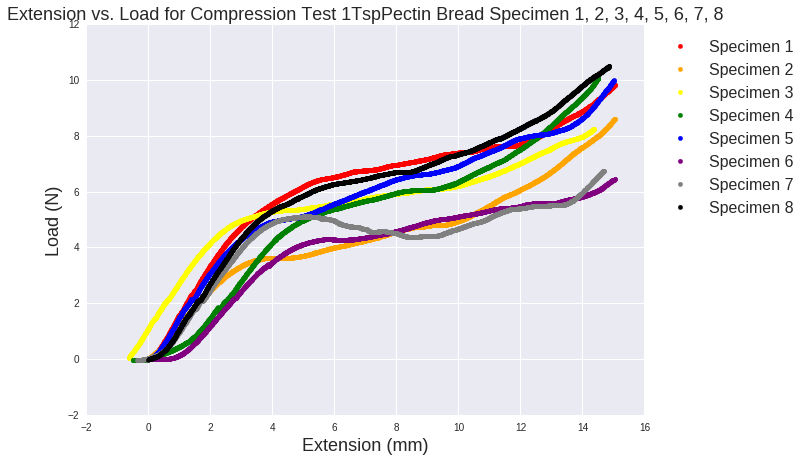

In [4]:
# plotting
pw = plt.figure(figsize=(10,7))
plt.scatter(p1tsp_compress1['Extension'].multiply(-1), p1tsp_compress1['Load'].multiply(-1), color='red')
plt.scatter(p1tsp_compress2['Extension'].multiply(-1), p1tsp_compress2['Load'].multiply(-1), color='orange')
plt.scatter(p1tsp_compress3['Extension'].multiply(-1), p1tsp_compress3['Load'].multiply(-1), color='yellow')
plt.scatter(p1tsp_compress4['Extension'].multiply(-1), p1tsp_compress4['Load'].multiply(-1), color='green')
plt.scatter(p1tsp_compress5['Extension'].multiply(-1), p1tsp_compress5['Load'].multiply(-1), color='blue')
plt.scatter(p1tsp_compress6['Extension'].multiply(-1), p1tsp_compress6['Load'].multiply(-1), color='purple')
plt.scatter(p1tsp_compress7['Extension'].multiply(-1), p1tsp_compress7['Load'].multiply(-1), color='gray')
plt.scatter(p1tsp_compress8['Extension'].multiply(-1), p1tsp_compress8['Load'].multiply(-1), color='black')

# formatting
plt.title('Extension vs. Load for Compression Test 1TspPectin Bread Specimen 1, 2, 3, 4, 5, 6, 7, 8', fontsize=18)
plt.xlabel('Extension (mm)', fontsize=18)
plt.ylabel('Load (N)', fontsize=18)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(['Specimen 1', 
            'Specimen 2', 
            'Specimen 3', 
            'Specimen 4', 
            'Specimen 5', 
            'Specimen 6', 
            'Specimen 7', 
            'Specimen 8'], 
            bbox_to_anchor=(1.01, 1), 
            loc=2, 
            fontsize=16)
plt.show()

# uncomment if figure saving is desired
# pw.savefig('figures/1TspPectin_Compression_Sp12345678.pdf', format='pdf', bbox_inches='tight')
# pw.savefig('figures/1TspPectin_Compression_Sp12345678.png', format='png', bbox_inches='tight')

### Helper function for plotting the compression test data for a given loaf's experiments :)

In [5]:
# def plot_cc_v1(dataframes, expname, save=False, filename="cc_figure", mode='Compression', num_specimen=8):
#     # dataframes: list of dataframes desired to plot
#     # expname: string of the experiment name (1Tsp Pectin, 8% Gluten, Xanthan Gum, etc. This is for the plot title.
#     # save: True or False -- specify whether or not you want to save the figure
#     # filename for the figure (it's saved as a png in the figures folder)
    
#     # plotting
#     pw = plt.figure(figsize=(10,7))
     
#     colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray', 'black', 'magenta', 'cyan']
#     for i in range(len(dataframes)):
#         plt.scatter(dataframes[i]['Extension'].multiply(-1), dataframes[i]['Load'].multiply(-1), color=colors[i])
        
#     # formatting
#     plt.title('%s Compressive Stress-Strain Response' % (expname), fontsize=18)
#     plt.xlabel('Extension (mm)', fontsize=18)
#     plt.ylabel('Load (N)', fontsize=18)
#     plt.rc('xtick', labelsize=15) 
#     plt.rc('ytick', labelsize=15) 
    
#     axes = plt.gca()
#     if mode == 'Compression':
#         axes.set_xlim([-2, 16])
#         axes.set_ylim([-2, 12])
    
#     plt.legend(['Specimen 1', 
#                 'Specimen 2', 
#                 'Specimen 3', 
#                 'Specimen 4', 
#                 'Specimen 5', 
#                 'Specimen 6', 
#                 'Specimen 7', 
#                 'Specimen 8'], 
#                 bbox_to_anchor=(1.01, 1), 
#                 loc=2, 
#                 fontsize=16)    
#     plt.show()
    
#     # saving the file
#     if save:
#         pw.savefig("figures/compress/%s.png" % filename, format='png', bbox_inches='tight')
#         pw.savefig("figures/compress/%s.pdf" % filename, format='pdf', bbox_inches='tight')

In [6]:
# def plot_cc(dataframes, expname, save=False, filename="cc_figure", mode='Compression', num_specimen=8, em_filename='em/x'):
#     # this plots extension vs. load
    
#     # dataframes: list of dataframes desired to plot
#     # expname: string of the experiment name (1Tsp Pectin, 8% Gluten, Xanthan Gum, etc. This is for the plot title.
#     # save: True or False -- specify whether or not you want to save the figure
#     # filename for the figure (it's saved as a png in the figures folder)
    
#     # plotting
#     pw = plt.figure(figsize=(10,7))
     
#     colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray', 'black', 'magenta', 'cyan']
#     for i in range(len(dataframes)):
#         stress = dataframes[i]['Load'].divide(-0.0003463)
#         strain = dataframes[i]['Extension'].divide(-25.4)
#         plt.scatter(dataframes[i]['Extension'].divide(-25.4), dataframes[i]['Load'].divide(-0.0003463), color=colors[i])
#         dataframes[i].loc[:, 'Elastic Modulus'] = stress.divide(strain)
#         to_csv_filename = em_filename + str(i+1) + ('.csv')
#         display(dataframes[i].head())
#         dataframes[i].to_csv(to_csv_filename)
        
#     # formatting
#     plt.title('%s Compressive Stress-Strain Response' % (expname), fontsize=18)
#     plt.xlabel('Strain (Pa)', fontsize=18)
#     plt.ylabel('Stress', fontsize=18)
#     plt.rc('xtick', labelsize=15) 
#     plt.rc('ytick', labelsize=15) 
    
#     axes = plt.gca()
#     if mode == 'Compression':
#         axes.set_xlim([0, 0.75])
#         axes.set_ylim([0, 30000])
    
#     plt.legend(['Specimen 1', 
#                 'Specimen 2', 
#                 'Specimen 3', 
#                 'Specimen 4', 
#                 'Specimen 5', 
#                 'Specimen 6', 
#                 'Specimen 7', 
#                 'Specimen 8'], 
#                 bbox_to_anchor=(1.01, 1), 
#                 loc=2, 
#                 fontsize=16)    
#     plt.show()
    
#     # saving the file
#     if save:
#         pw.savefig("figures/compress/%s.png" % filename, format='png', bbox_inches='tight')
#         pw.savefig("figures/compress/%s.pdf" % filename, format='pdf', bbox_inches='tight')

In [7]:
def plot_cc(dataframes, expname, save=False, filename="cc_figure", mode='Compression', num_specimen=8):
    # this plots extension vs. load
    
    # dataframes: list of dataframes desired to plot
    # expname: string of the experiment name (1Tsp Pectin, 8% Gluten, Xanthan Gum, etc. This is for the plot title.
    # save: True or False -- specify whether or not you want to save the figure
    # filename for the figure (it's saved as a png in the figures folder)
    
    # plotting
    pw = plt.figure(figsize=(10,7))
     
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray', 'black', 'magenta', 'cyan']
    for i in range(len(dataframes)):
        plt.scatter(dataframes[i]['Extension'].divide(-25.4), dataframes[i]['Load'].divide(-0.0003463), color=colors[i])
        
    # formatting
    plt.title('%s Compressive Stress-Strain Response' % (expname), fontsize=18)
    plt.xlabel('Strain (Pa)', fontsize=18)
    plt.ylabel('Stress', fontsize=18)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    
    axes = plt.gca()
    if mode == 'Compression':
        axes.set_xlim([0, 0.75])
        axes.set_ylim([0, 35000])
    
    plt.legend(['Specimen 1', 
                'Specimen 2', 
                'Specimen 3', 
                'Specimen 4', 
                'Specimen 5', 
                'Specimen 6', 
                'Specimen 7', 
                'Specimen 8'], 
                bbox_to_anchor=(1.01, 1), 
                loc=2, 
                fontsize=16)    
    plt.show()
    
    # saving the file
    if save:
        pw.savefig("figures/compress/%s.png" % filename, format='png', bbox_inches='tight')
        pw.savefig("figures/compress/%s.pdf" % filename, format='pdf', bbox_inches='tight')

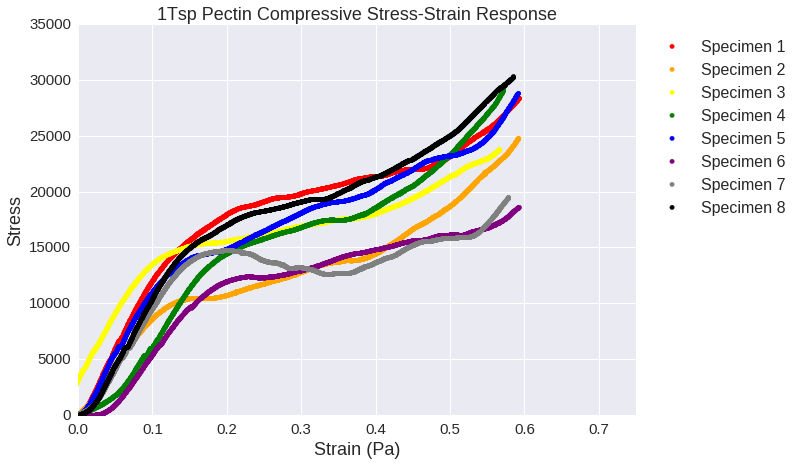

In [8]:
plot_cc([p1tsp_compress1, 
         p1tsp_compress2, 
         p1tsp_compress3,
         p1tsp_compress4,
         p1tsp_compress5, 
         p1tsp_compress6, 
         p1tsp_compress7, 
         p1tsp_compress8], 
         '1Tsp Pectin', 
         True, 
         '1TspPectin_compress')
#          em_filename = 'em/1pectin')

In [9]:
display(p1tsp_compress1['Extension'].divide(-25.4))
display(p1tsp_compress1['Load'].divide(-0.0003463))

,(mm)
0,-0.000000
1,0.000037
2,0.000189
3,0.000535
4,0.000971
5,0.001381
6,0.001774
7,0.002152
8,0.002515
9,0.002871


,(N)
0,6.035230
1,-5.140052
2,11.926076
3,21.426509
4,51.891424
5,80.825874
6,103.494080
7,130.580422
8,147.877563
9,171.989604


In [10]:
# p1tsp_compress1['Load'].divide(-0.0003463).divide(100)

p1tsp_compress1['Load'].divide(-0.0003463).divide(1000)

,(N)
0,0.006035
1,-0.005140
2,0.011926
3,0.021427
4,0.051891
5,0.080826
6,0.103494
7,0.130580
8,0.147878
9,0.171990


#### 3TspPectin (also April 11, 2016)

In [11]:
# import
p3tsp_compress1 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p3tsp_compress2 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p3tsp_compress3 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p3tsp_compress4 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p3tsp_compress5 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p3tsp_compress6 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p3tsp_compress7 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])

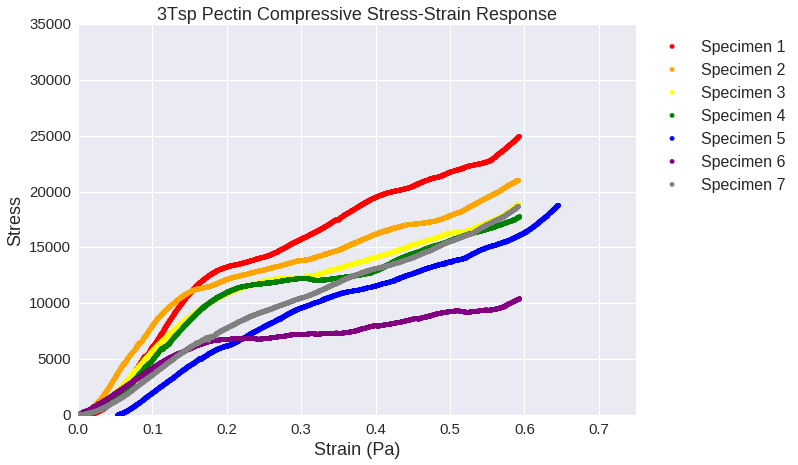

In [12]:
plot_cc([p3tsp_compress1, 
         p3tsp_compress2, 
         p3tsp_compress3,
         p3tsp_compress4,
         p3tsp_compress5, 
         p3tsp_compress6, 
         p3tsp_compress7], 
         '3Tsp Pectin', 
         True, 
         '3TspPectin_compress')
#          num_specimen=7)

#### Second trial of 13PercentGluten (April 18, 2016)

In [13]:
# import
g2_13_compress1 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_13_compress2 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_13_compress3 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_13_compress4 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])
g2_13_compress5 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_5.csv', header=[0,1])
g2_13_compress6 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_6.csv', header=[0,1])
g2_13_compress7 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_7.csv', header=[0,1])
g2_13_compress8 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_8.csv', header=[0,1])

In [14]:
# TODO: determine whether sample 5 data has an offset that we should account for
display(g2_13_compress5.head())

,Time,Extension,Load
,(sec),(mm),(N)
0,0.00,-0.00027,-1.02753
1,0.05,-0.00133,-1.02622
2,0.10,-0.00573,-1.03442
3,0.15,-0.01493,-1.05162
4,0.20,-0.02547,-1.08209


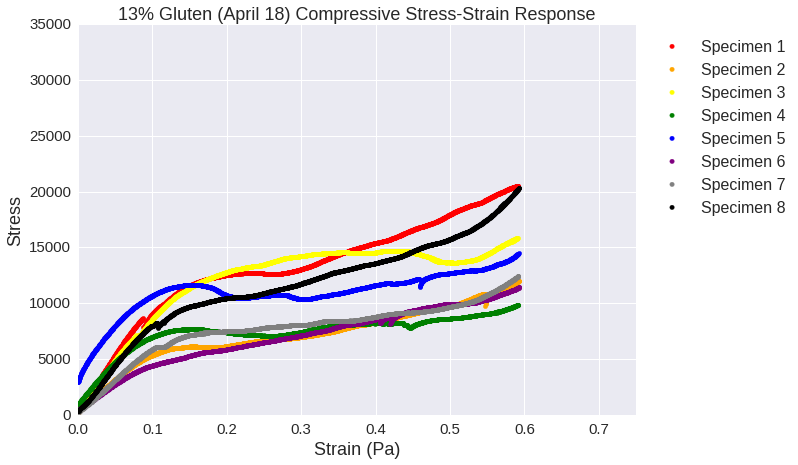

In [15]:
plot_cc([g2_13_compress1, 
         g2_13_compress2, 
         g2_13_compress3,
         g2_13_compress4,
         g2_13_compress5, 
         g2_13_compress6, 
         g2_13_compress7,
         g2_13_compress8], 
         '13% Gluten (April 18)', 
         True, 
         '2_13PercentGluten_compress')

#### Second trial of 13PercentGluten (April 18, 2016)

In [16]:
# import
g2_8_compress1 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_8_compress2 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_8_compress3 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_8_compress4 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_8_compress5 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_8_compress6 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_8_compress7 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])
g2_8_compress8 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_5.csv', header=[0,1])

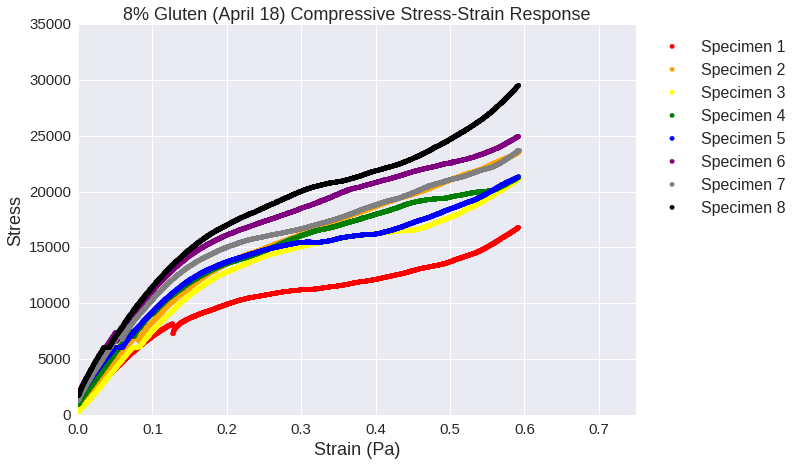

In [17]:
plot_cc([g2_8_compress1, 
         g2_8_compress2, 
         g2_8_compress3,
         g2_8_compress4,
         g2_8_compress5, 
         g2_8_compress6, 
         g2_8_compress7,
         g2_8_compress8], 
         '8% Gluten (April 18)',
         True, 
         '2_8PercentGluten_compress')

### XG Bend Tests (Specimen 1, 2, 3)

Data taken on March 24, 2016

Go to instron_bend.ipynb

In [18]:
# # import
# XG_bend1 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_1.csv', header=[0, 1])
# XG_bend2 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_2.csv', header=[0, 1])
# XG_bend3 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_3.csv', header=[0, 1])

In [19]:
# # plotting
# pw = plt.figure(figsize=(10,7))
# plt.scatter(XG_bend1['Extension'], XG_bend1['Load'], color='r')
# plt.scatter(XG_bend2['Extension'], XG_bend2['Load'], color='g')
# plt.scatter(XG_bend3['Extension'], XG_bend3['Load'], color='c')

# # formatting
# plt.title('Extension vs. Load for Bend Test XG Bread Specimen 1, 2, 3', fontsize=18)
# plt.xlabel('Extension (mm)', fontsize=18)
# plt.ylabel('Load (N)', fontsize=18)
# plt.rc('xtick', labelsize=15) 
# plt.rc('ytick', labelsize=15) 
# plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'], loc=2, fontsize=16, bbox_to_anchor=(1.01, 1))
# plt.show()

# # uncomment if figure saving is desired
# # pw.savefig('figures/XG_Bend_Sp123.pdf', format='pdf', bbox_inches='tight')
# # pw.savefig('figures/XG_Bend_Sp123.png', format='png', bbox_inches='tight')

In [20]:
# using the helper function

# plot_cc([XG_bend1, 
#          XG_bend2, 
#          XG_bend3], 
#          'Xanthan Gum', 
#          True, 
#          'XG_bend_Sp123',
#          num_specimen = 3,
#          mode = 'Bend')

Elizabeth's comment: Specimen 1 didn't break, so that's why its curve is a significantly different shape than Specimen 2 and 3's.

Further calculations and graphs for the bend tests TBD.